In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import *
import math
import os
import time
from skimage.io import imread
from skimage import img_as_float
from scipy import fftpack
import cv2 as cv
from scipy.signal import convolve2d

In [2]:
image = imread('CNTs.tif')
image = image[:,:,0]

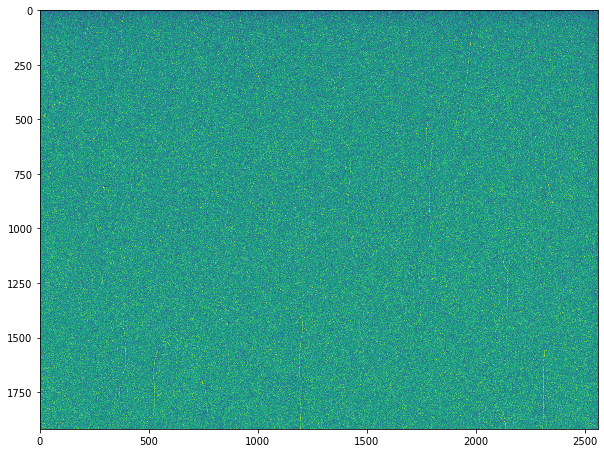

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.imshow(image)

In [4]:
image_fft = fftpack.fft2(image)

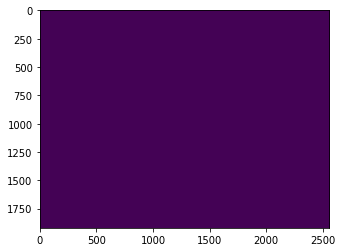

In [5]:
plt.imshow(np.real(image_fft))

In [6]:
keep_fraction = 0.1

image_fft2 = image_fft.copy()

r, c = image_fft2.shape

image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

In [7]:
image_new = fftpack.ifft2(image_fft2).real
image_new = (image_new/np.max(image_new)*255).astype(int)

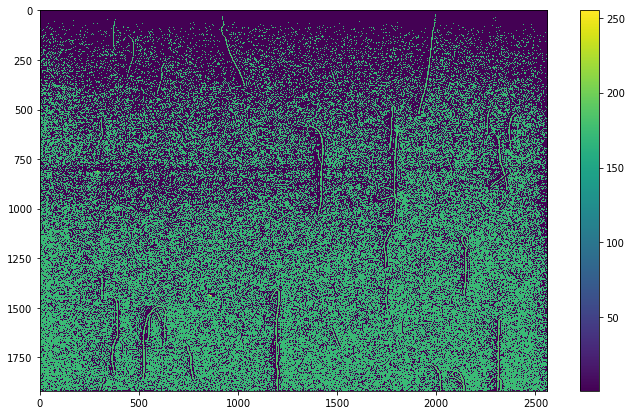

In [31]:
fig, ax = plt.subplots(figsize = (12, 7))
qqq = np.copy(image_new)
qqq[qqq < 170] = 1
plt.imshow(qqq)
plt.colorbar()

In [19]:
filt = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

test1 = convolve2d(image_new, filt, mode = 'same')
test2 = convolve2d(image_new, filt.T, mode = 'same')
inter = (np.abs(test1) + np.abs(test2))/np.max((np.abs(test1) + np.abs(test2)))
# inter = 10**inter

C:\Users\kpebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


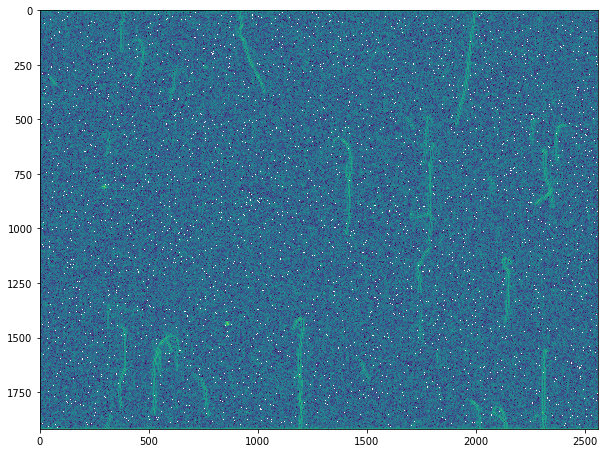

In [22]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.imshow(np.log10(inter))

In [9]:
# blur = cv.GaussianBlur(image_new.astype('uint8'),(5,5),0)
ret, thresh = cv.threshold(image_new.astype('uint8'), 180, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

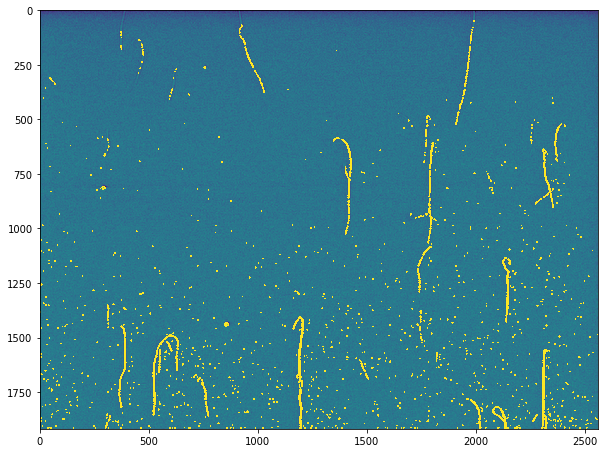

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
imgm = cv.drawContours(image_new, contours, -1, 255, 5)
plt.imshow(imgm)

In [11]:
np.unique(thresh)

array([  0, 255], dtype=uint8)

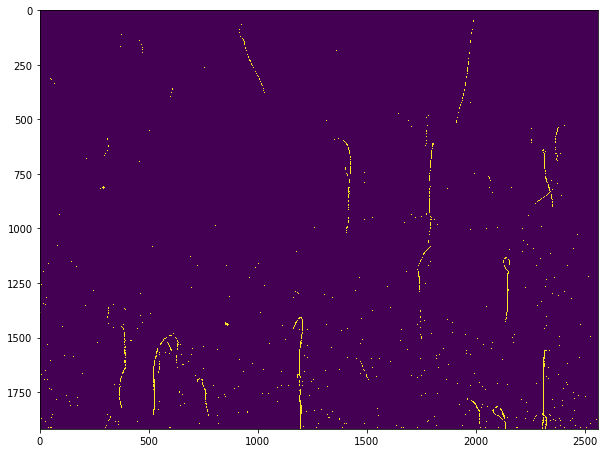

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(thresh)

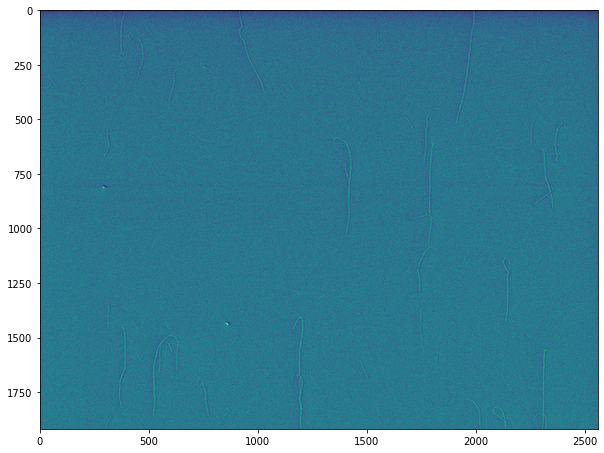

In [13]:
image_fft2 = fftpack.fft2(thresh)
keep_fraction = 0.1

image_fft2_2 = image_fft.copy()

r, c = image_fft2_2.shape

image_fft2_2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
image_fft2_2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
image_new_2 = fftpack.ifft2(image_fft2_2).real
image_new_2 = (image_new_2/np.max(image_new)*255).astype(int)
fig, ax = plt.subplots(figsize = (10, 10))
plt.imshow(image_new_2)

In [35]:
inputImage = image_new.astype('uint8')
# inputImageGray = cv.cvtColor(inputImage, cv.COLOR_BGR2GRAY)
edges = cv.Canny(inputImage,120,255,apertureSize = 3)
minLineLength = 50
maxLineGap = 10
lines = cv.HoughLinesP(edges,cv.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv.polylines(inputImage, [pts], True, (0,255,0))

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(inputImage,"Tracks Detected", (500, 250), font, 0.5, 255)
cv.imshow("Trolley_Problem_Result", inputImage)
cv.imshow('edge', edges)
cv.waitKey(0)

-1

In [24]:
cv.HoughLinesP?

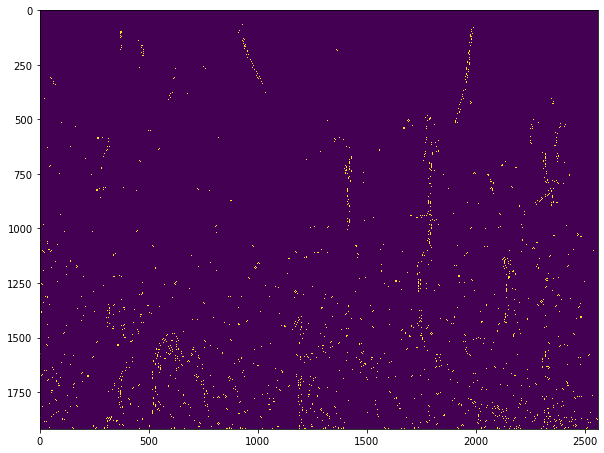

In [30]:
fix, ax = plt.subplots(figsize = (10, 10))
plt.imshow(edges)